In [ ]:
!pip install numpy
!pip install scikit-surprise

**Introduction to Surprise**

1. https://github.com/NicolasHug/Surprise  
2. http://surpriselib.com/
3. https://surprise.readthedocs.io/en/stable/



**SurPRISE - Simple Python RecommendatIon System Engine**

In [1]:
import surprise

In [2]:
dir(surprise)

['AlgoBase',
 'BaselineOnly',
 'CoClustering',
 'Dataset',
 'KNNBaseline',
 'KNNBasic',
 'KNNWithMeans',
 'KNNWithZScore',
 'NMF',
 'NormalPredictor',
 'Prediction',
 'PredictionImpossible',
 'Reader',
 'SVD',
 'SVDpp',
 'SlopeOne',
 'Trainset',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'accuracy',
 'builtin_datasets',
 'dataset',
 'dump',
 'get_dataset_dir',
 'get_distribution',
 'model_selection',
 'prediction_algorithms',
 'reader',
 'similarities',
 'trainset',
 'utils']

# **1. Datasets**

In [3]:
from surprise import Dataset

<font size="3">The dataset module defines the Dataset class and other subclasses which are used for managing datasets.<font>

Src: https://github.com/NicolasHug/Surprise/blob/master/surprise/dataset.py
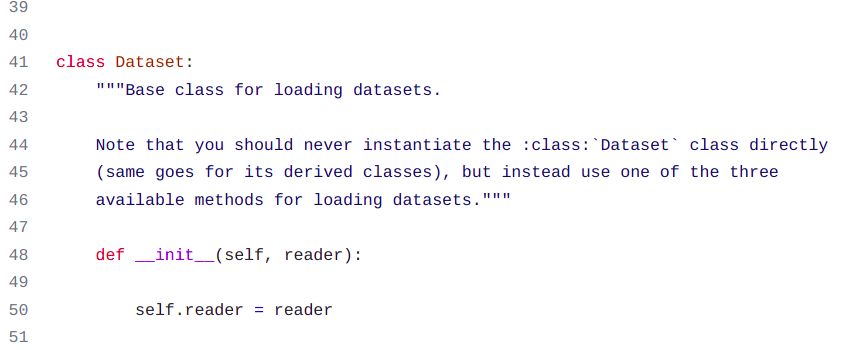

Src: https://github.com/NicolasHug/Surprise/blob/46b9914995e6c8c7d227b46f2eaeef2d4600580f/surprise/reader.py#L9
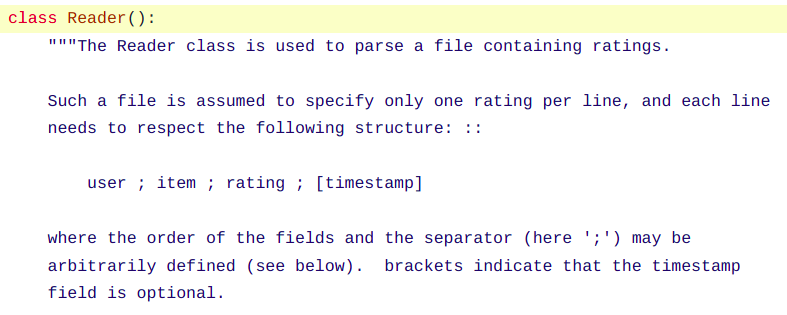

Has attributes such as separator, rating_scale

<font size="4">Three ways to load datasets:
1. Dataset.load_builtin(name)
2. Dataset.load_from_file(file_path, reader)
3. Dataset.load_from_df(df, reader)
<font>

## 1.1 Load builtin dataset

In [4]:
Dataset.load_builtin??

<font size="4">MovieLens https://grouplens.org/datasets/movielens/
1. MovieLens 100k
2. MovieLens 1M
<font>

<font size="4">
Jester Joke Dataset http://eigentaste.berkeley.edu/dataset/
3. Jester<font>

In [5]:
ml100k_data = Dataset.load_builtin('ml-100k')

In [ ]:
dir(ml100k_data)

In [ ]:
ml100k_data.ratings_file

In [51]:
!ls /home/shruti/.surprise_data/ml-100k/ml-100k/

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [53]:
!head /home/shruti/.surprise_data/ml-100k/ml-100k/u.user

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703


In [14]:
!head /home/shruti/.surprise_data/ml-100k/ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


ml100k_data.build_full_trainset - """Do not split the dataset into folds and just return a trainset as is, built from the whole dataset."""

### Src: https://github.com/NicolasHug/Surprise/blob/46b9914995e6c8c7d227b46f2eaeef2d4600580f/surprise/trainset.py
<font size="5"> Trainset class contains all useful data that constitute a training set. It is used by the fit() method of every prediction algorithm.<font>


<font size="5">Trainsets are different from class Datasets. You can think of a Dataset as the raw data, and Trainsets as higher-level data where useful methods are defined. Also, a Dataset may be comprised of multiple Trainsets (e.g. when doing cross validation).<font>

In [ ]:
ml100k_data.construct_trainset??

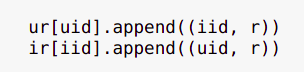

In [ ]:
ml100k_data.has_been_split

## 1.2 Reading a dataset from a file

In [6]:
from surprise import Reader

In [ ]:
Reader??

In [ ]:
!mkdir custom_dataset
!head /home/shruti/.surprise_data/ml-100k/ml-100k/u.data > custom_dataset/small_ml

In [ ]:
!cat custom_dataset/small_ml

In [7]:
reader = Reader(rating_scale=(1, 5))

In [8]:
Dataset.load_from_file??

In [9]:
file_data = Dataset.load_from_file('custom_dataset/small_ml', reader)

In [10]:
dir(file_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'build_full_trainset',
 'construct_testset',
 'construct_trainset',
 'has_been_split',
 'load_builtin',
 'load_from_df',
 'load_from_file',
 'load_from_folds',
 'ratings_file',
 'raw_ratings',
 'read_ratings',
 'reader']

## 1.3 Load from a dataframe

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv??

In [ ]:
df = pd.read_csv

In [ ]:
pd.read_csv??

In [13]:
df = pd.read_csv('custom_dataset/small_ml', sep='\t', names=['user', 'item','rating', 'timestamp'])
df.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
df_data = Dataset.load_from_df(df[['user', 'item','rating']], reader)

In [16]:
dir(df_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'build_full_trainset',
 'construct_testset',
 'construct_trainset',
 'df',
 'has_been_split',
 'load_builtin',
 'load_from_df',
 'load_from_file',
 'load_from_folds',
 'raw_ratings',
 'read_ratings',
 'reader']

# 2. Prediction Algos

<font size="3">Includes the prediction algorithms available for recommendation.<font>

SRC: https://github.com/NicolasHug/Surprise/tree/46b9914995e6c8c7d227b46f2eaeef2d4600580f/surprise/prediction_algorithms

https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html#

| Algorithm |                Description                                                                             |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| random_pred.NormalPredictor  | Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.                                                                                                                                          |
| baseline_only.BaselineOnly  | Algorithm predicting the baseline estimate for given user and item.                                                                                                                                           |
| knns.KNNBasic               | A basic collaborative filtering algorithm.                                                                                                                                                                    |
| knns.KNNWithMeans           | A basic collaborative filtering algorithm, taking into account the mean ratings of each user.                                                                                                                 |
| knns.KNNWithZScore          | A basic collaborative filtering algorithm, taking into account the z-score normalization of each user.                                                                                                        |
| knns.KNNBaseline            | A basic collaborative filtering algorithm taking into account a baseline rating.                                                                                                                              |
| matrix_factorization.SVD    | The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.When baselines are not used, this is equivalent to Probabilistic Matrix Factorization [salakhutdinov2008a] (see note below).. |
| matrix_factorization.SVDpp  | The SVD++ algorithm, an extension of SVD taking into account implicit ratings.                                                                                                                                |
| matrix_factorization.NMF    | A collaborative filtering algorithm based on Non-negative Matrix Factorization.                                                                                                                               |
| slope_one.SlopeOne          | A simple yet accurate collaborative filtering algorithm.                                                                                                                                                      |
| co_clustering.CoClustering  | A collaborative filtering algorithm based on co-clustering.                                                                                                                                                   |

### 2.1 Random Normal Predictor

Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.

In [17]:
from surprise import NormalPredictor

In [18]:
from surprise.model_selection import train_test_split
from surprise import accuracy

In [19]:
NormalPredictor??

In [20]:
rand_normal_algo = NormalPredictor()

In [21]:
trainset, testset = train_test_split(ml100k_data, test_size=0.2)

In [22]:
train_test_split??

In [30]:
type(trainset), type(testset), type(testset[0]), testset[0]

(surprise.trainset.Trainset, list, tuple, ('468', '273', 2.0))

In [25]:
rand_normal_algo.fit(trainset)

In [26]:
test_predictions = rand_normal_algo.test(testset)

In [28]:
type(test_predictions)

list

In [32]:
test_predictions[1]

Prediction(uid='904', iid='682', r_ui=4.0, est=3.6319426884117982, details={'was_impossible': False})

<font size="3">**Prediction**<font> 
SRC: https://github.com/NicolasHug/Surprise/blob/master/surprise/prediction_algorithms/predictions.py

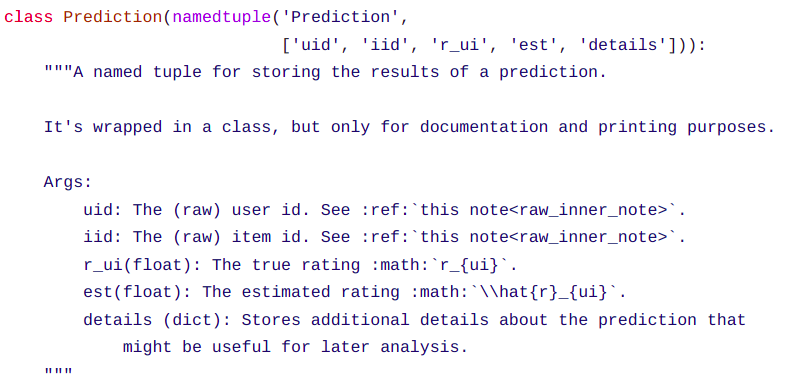

In [33]:
all_predictions = [round(pred_rating[3]) for pred_rating in test_predictions]
all_org_ratings = [pred_rating[2] for pred_rating in test_predictions]

In [34]:
import matplotlib.pyplot as plt

(array([   0.,  659., 2842., 6252., 6413., 3834.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <BarContainer object of 6 artists>)

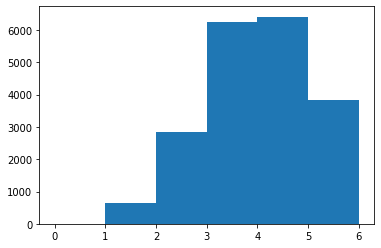

In [35]:
plt.hist(all_predictions, bins=list(range(0,7)))

(array([   0., 1241., 2294., 5376., 6839., 4250.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <BarContainer object of 6 artists>)

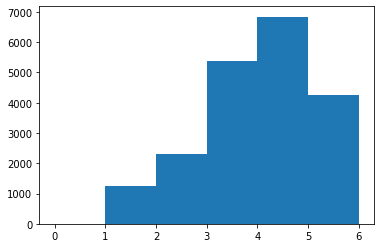

In [36]:
plt.hist(all_org_ratings, bins=list(range(0,7)))

In [38]:
test_predictions = rand_normal_algo.test(testset, verbose=False)
accuracy.rmse(test_predictions)

RMSE: 1.5329


1.5329364840627795

# 3. Model Selection

<font size="3"> Tools to run cross-validation procedures and search the best parameters for a prediction algorithm.<font>

In [39]:
from surprise.model_selection import cross_validate

In [41]:
cross_validate(rand_normal_algo, ml100k_data, measures=['RMSE', 'MAE'], cv=3, verbose=True);

Evaluating RMSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.5240  1.5233  1.5169  1.5214  0.0032  
MAE (testset)     1.2232  1.2251  1.2184  1.2222  0.0028  
Fit time          0.10    0.09    0.11    0.10    0.01    
Test time         0.25    0.20    0.24    0.23    0.02    


<font size="3"> Can also perform GridSearch (similar to scikit-learn)<font>

In [42]:
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, SVD

In [47]:
SVD??

In [44]:
list(range(10, 50, 10))

[10, 20, 30, 40]

In [45]:
param_grid = {'k': list(range(10, 50, 10))}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(ml100k_data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [46]:
# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9851869975980616
{'k': 30}


Notice the computation is carried out 12 times.

In [48]:
SVD??

In [49]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(ml100k_data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

KeyboardInterrupt: 

<font size="3">Other available functionalities: https://surprise.readthedocs.io/en/stable/model_selection.html  <font>

| Def             | Description                                                                                    |
|-----------------|------------------------------------------------------------------------------------------------|
| KFold           | A basic cross-validation iterator.                                                             |
| RepeatedKFold   | Repeated KFold cross validator.                                                                |
| ShuffleSplit    | A basic cross-validation iterator with random trainsets and testsets.                          |
| LeaveOneOut     | Cross-validation iterator where each user has exactly one rating in the testset.               |
| PredefinedKFold | A cross-validation iterator to when a dataset has been loaded with the load_from_folds method. |

# 4. Similarities

<font size="3">The similarities module includes tools to compute similarity metrics between users or items. <font>

https://surprise.readthedocs.io/en/stable/similarities.html

| Sim Measure      | Description                                                                                                                                |
|------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| cosine           | Compute the cosine similarity between all pairs of users (or items).                                                                       |
| msd              | Compute the Mean Squared Difference similarity between all pairs of users (or items).                                                      |
| pearson          | Compute the Pearson correlation coefficient between all pairs of users (or items).                                                         |
| pearson_baseline | Compute the (shrunk) Pearson correlation coefficient between all pairs of users (or items) using baselines for centering instead of means. |

# 5. Accuracy Module

<font size="3">The surprise.accuracy module provides tools for computing accuracy metrics on a set of predictions.<font>

| Metric | Description                                 |
|--------|---------------------------------------------|
| rmse   | Compute RMSE (Root Mean Squared Error).     |
| mse    | Compute MSE (Mean Squared Error).           |
| mae    | Compute MAE (Mean Absolute Error).          |
| fcp    | Compute FCP (Fraction of Concordant Pairs). |

-----

# KNN Example

SRC: https://github.com/NicolasHug/Surprise/blob/master/examples/k_nearest_neighbors.py

In [50]:
"""
This module illustrates how to retrieve the k-nearest neighbors of an item. The
same can be done for users with minor changes. There's a lot of boilerplate
because of the id conversions, but it all boils down to the use of
algo.get_neighbors().
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import io

from surprise import KNNBasic, KNNWithZScore
from surprise import Dataset
from surprise import get_dataset_dir

In [70]:
KNNWithZScore??

In [54]:
def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """

    file_name = get_dataset_dir() + '/ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid

In [71]:
# First, train the algortihm to compute the similarities between items
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()

sim_options = {'name': 'cosine', 'user_based': True}

In [72]:
algo = KNNWithZScore(sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [57]:
# Read the mappings raw id <-> movie name
rid_to_name, name_to_rid = read_item_names()

In [58]:
name_to_rid

{'Toy Story (1995)': '1',
 'GoldenEye (1995)': '2',
 'Four Rooms (1995)': '3',
 'Get Shorty (1995)': '4',
 'Copycat (1995)': '5',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': '6',
 'Twelve Monkeys (1995)': '7',
 'Babe (1995)': '8',
 'Dead Man Walking (1995)': '9',
 'Richard III (1995)': '10',
 'Seven (Se7en) (1995)': '11',
 'Usual Suspects, The (1995)': '12',
 'Mighty Aphrodite (1995)': '13',
 'Postino, Il (1994)': '14',
 "Mr. Holland's Opus (1995)": '15',
 'French Twist (Gazon maudit) (1995)': '16',
 'From Dusk Till Dawn (1996)': '17',
 'White Balloon, The (1995)': '18',
 "Antonia's Line (1995)": '19',
 'Angels and Insects (1995)': '20',
 'Muppet Treasure Island (1996)': '21',
 'Braveheart (1995)': '22',
 'Taxi Driver (1976)': '23',
 'Rumble in the Bronx (1995)': '24',
 'Birdcage, The (1996)': '25',
 'Brothers McMullen, The (1995)': '26',
 'Bad Boys (1995)': '27',
 'Apollo 13 (1995)': '28',
 'Batman Forever (1995)': '29',
 'Belle de jour (1967)': '30',
 'Crimson Tide (1995

In [73]:
# Retrieve inner id of the movie Star Trek VI: The Undiscovered Country (1991)
toy_story_raw_id = name_to_rid['Godfather: Part II, The (1974)']
toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)

In [74]:
# Retrieve inner ids of the nearest neighbors of Star Trek VI: The Undiscovered Country (1991)
toy_story_neighbors = algo.get_neighbors(toy_story_inner_id, k=20)

In [75]:
toy_story_neighbors

[16,
 31,
 89,
 108,
 128,
 183,
 255,
 302,
 345,
 372,
 402,
 419,
 481,
 545,
 598,
 614,
 697,
 729,
 774,
 554]

In [76]:
# Convert inner ids of the neighbors into names.
toy_story_neighbors = (algo.trainset.to_raw_iid(inner_id)
                       for inner_id in toy_story_neighbors)
toy_story_neighbors = (rid_to_name[rid]
                       for rid in toy_story_neighbors)


print('The 20 nearest neighbors of Godfather: Part II, The (1974) are:')
for movie in toy_story_neighbors:
    print(movie)

The 20 nearest neighbors of Godfather: Part II, The (1974) are:
Age of Innocence, The (1993)
Silence of the Lambs, The (1991)
Sense and Sensibility (1995)
Annie Hall (1977)
Get on the Bus (1996)
Flirting With Disaster (1996)
Afterglow (1997)
That Thing You Do! (1996)
Pinocchio (1940)
Fools Rush In (1997)
Shiloh (1997)
Faithful (1996)
Denise Calls Up (1995)
Amityville: Dollhouse (1996)
D3: The Mighty Ducks (1996)
Happy Gilmore (1996)
Ran (1985)
His Girl Friday (1940)
High School High (1996)
Wedding Singer, The (1998)
